<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importations" data-toc-modified-id="Importations-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importations</a></span></li><li><span><a href="#Analyse-en-composantes-principales" data-toc-modified-id="Analyse-en-composantes-principales-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analyse en composantes principales</a></span><ul class="toc-item"><li><span><a href="#Standardisation" data-toc-modified-id="Standardisation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Standardisation</a></span></li><li><span><a href="#Test-PCA-non-linéaire" data-toc-modified-id="Test-PCA-non-linéaire-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Test PCA non linéaire</a></span></li></ul></li><li><span><a href="#Segmentation-sur-3-variables-:-RFM" data-toc-modified-id="Segmentation-sur-3-variables-:-RFM-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Segmentation sur 3 variables : RFM</a></span><ul class="toc-item"><li><span><a href="#ACP" data-toc-modified-id="ACP-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>ACP</a></span></li><li><span><a href="#Coefficient-de-silhouette-et-méthode-du-coude" data-toc-modified-id="Coefficient-de-silhouette-et-méthode-du-coude-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Coefficient de silhouette et méthode du coude</a></span></li><li><span><a href="#Visualisation" data-toc-modified-id="Visualisation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Visualisation</a></span><ul class="toc-item"><li><span><a href="#Visualisation-sans-ACP" data-toc-modified-id="Visualisation-sans-ACP-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Visualisation sans ACP</a></span></li></ul></li><li><span><a href="#Clustering-hierarchique---Dendogram" data-toc-modified-id="Clustering-hierarchique---Dendogram-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Clustering hierarchique - Dendogram</a></span></li><li><span><a href="#Clustering-par-densité--:-DBscan" data-toc-modified-id="Clustering-par-densité--:-DBscan-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Clustering par densité  : DBscan</a></span></li></ul></li><li><span><a href="#Segmentation-avec-4-variables" data-toc-modified-id="Segmentation-avec-4-variables-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Segmentation avec 4 variables</a></span><ul class="toc-item"><li><span><a href="#ACP" data-toc-modified-id="ACP-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>ACP</a></span></li><li><span><a href="#Coefficient-de-silhouette-et-méthode-du-coude" data-toc-modified-id="Coefficient-de-silhouette-et-méthode-du-coude-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Coefficient de silhouette et méthode du coude</a></span></li><li><span><a href="#Kmeans" data-toc-modified-id="Kmeans-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Kmeans</a></span></li></ul></li><li><span><a href="#Export-pour-contrat-de-maintenance" data-toc-modified-id="Export-pour-contrat-de-maintenance-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Export pour contrat de maintenance</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Projet 5 :  Segmentez des clients d'un site e-commerce

# Essais de segmentations 
## Importations 

In [1]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
import plotly
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode
import plotly.express as px
import plotly.graph_objects as go
import scipy
from scipy import stats
from scipy.cluster.hierarchy import dendrogram
import seaborn as sns
import sklearn 
from sklearn import decomposition
from sklearn import preprocessing
from sklearn import manifold
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

import sys
import time
from yellowbrick.cluster import KElbowVisualizer 
from yellowbrick.cluster import SilhouetteVisualizer

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

init_notebook_mode(connected=True)
pd.set_option('display.max_columns', 100)

# Versions
print('Version des librairies utilisées :')

print('NumPy                 : ' + np.version.full_version)
print('Pandas                : ' + pd.__version__)
print('Python                : ' + sys.version)
print('Plotly                : ' + plotly.__version__)
#print('Matplotlib            : ' + mpl.__version__)
print('Scipy                 : '+ scipy.__version__)
print('Seaborn               : ' + sns.__version__)
print('Sklearn               : ' + sklearn.__version__)

Version des librairies utilisées :
NumPy                 : 1.20.3
Pandas                : 1.4.1
Python                : 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
Plotly                : 5.6.0
Scipy                 : 1.7.3
Seaborn               : 0.11.2
Sklearn               : 1.0.2


In [2]:
df = pd.read_csv("data_agg_cleaned.csv")
df_total = pd.read_csv("data_cleaned.csv")

In [3]:
df

,customer_unique_id,frequency,order_purchase_timestamp,recency,customer_state,prefered_payment,tot_product,most_frequent_number_of_payments,payment_value,review_score,number_of_different_category
0,0000366f3b9a7992bf8c76cfdf3221e2,1,2018-05-10 10:56:27,111.0,SP,credit_card,1,8.0,141.90,5.0,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,2018-05-07 11:11:27,114.0,SP,credit_card,1,1.0,27.19,4.0,1
2,0000f46a3911fa3c0805444483337064,1,2017-03-10 21:05:03,536.0,SC,credit_card,1,8.0,86.22,3.0,1
3,0000f6ccb0745a6a4b88665a16c9f078,1,2017-10-12 20:29:41,320.0,PA,credit_card,1,4.0,43.62,4.0,1
4,0004aac84e0df4da2b147fca70cf8255,1,2017-11-14 19:45:42,287.0,SP,credit_card,1,6.0,196.89,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...
93352,fffcf5a5ff07b0908bd4e2dbc735a684,1,2017-06-08 21:00:36,446.0,PE,credit_card,4,10.0,4134.84,5.0,1
93353,fffea47cd6d3cc0a88bd621562a9d061,1,2017-12-10 20:07:56,261.0,BA,credit_card,1,1.0,84.58,4.0,1
93354,ffff371b4d645b6ecea244b27531430a,1,2017-02-07 15:49:16,567.0,MT,credit_card,1,1.0,112.46,5.0,1
93355,ffff5962728ec6157033ef9805bacc48,1,2018-05-02 15:17:41,118.0,ES,credit_card,1,5.0,133.69,5.0,1


In [4]:
df.set_index('customer_unique_id', inplace=True)

In [5]:
X = df.drop(columns=['order_purchase_timestamp','customer_state']) 

In [6]:
X.review_score = X.review_score.fillna(0)
X.most_frequent_number_of_payments = X.most_frequent_number_of_payments.fillna(1)

## Analyse en composantes principales 

In [7]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    '''
    Trace les cercles de corrélations 
    '''
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10,10))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(
                    LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i],
                                 fontsize='14', ha='center',
                                 va='center', rotation=label_rotation,
                                 color="black", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.axis('square')
            plt.grid(True)
            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
            plt.show()
def display_factorial_planes(X_projected, n_comp, pca,
                             axis_ranks,couleurs = None,
                             labels=None,
                             n_cols=3, alpha=1,
                             illustrative_var=None, lab_on = True, size= 10):
     for i, (d1, d2) in (enumerate(axis_ranks)):
        if d2 < n_comp:
 
            # initialisation de la figure 
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha, s=size)
            else:
                illustrative_var = np.array(illustrative_var)
                label_patches = []
                colors = couleurs
                i=0
                
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value, c= colors[i])
                    label_patch = mpatches.Patch(color=colors[i],
                                                 label=value)
                    label_patches.append(label_patch)
                    i += 1
                    ax.legend(
                        handles=label_patches,
                        bbox_to_anchor=(
                            1.05,
                            1),
                        loc=2,
                        borderaxespad=0.,
                        facecolor='white')
                plt.legend()

            # affichage des labels des points
            if labels is not None and lab_on:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
            #plt.grid(False)

def display_scree_plot(pca):
    taux_var_exp = pca.explained_variance_ratio_
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    ax1 = plt.gca()
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.axhline(y=90,color='r')
    plt.text(2, 92, '>90%', color='r', fontsize=10)
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    for i, p in enumerate(ax1.patches):
        ax1.text(
            p.get_width() /
            5 +
            p.get_x(),
            p.get_height() +
            p.get_y() +
            0.3,
            '{:.0f}%'.format(
                taux_var_exp[i] *
                100),
            fontsize=8,
            color='k')
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

### Standardisation

In [8]:
categorical = X.select_dtypes(['object']).columns
numerical = X.select_dtypes(['int64','float64']).columns

ohe = OneHotEncoder(sparse=False)
ss = StandardScaler()

In [9]:
categorical

Index(['prefered_payment'], dtype='object')

In [10]:
X_scaled= X.copy()
X_scaled[numerical]= ss.fit_transform(X_scaled[numerical])

ohe.fit(X_scaled[categorical])

X_scaled = pd.merge(X_scaled[numerical], pd.DataFrame(columns = ohe.get_feature_names().tolist(),
              data = ohe.fit_transform(X_scaled[categorical])).set_index(X_scaled.index),
        left_index = True, right_index = True)

In [11]:
X_scaled

,frequency,recency,tot_product,most_frequent_number_of_payments,payment_value,review_score,number_of_different_category,x0_boleto,x0_credit_card,x0_debit_card,x0_voucher
customer_unique_id,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,-0.15983,-0.825362,-0.060722,1.859936,-0.139967,0.662178,-0.142704,0.0,1.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,-0.15983,-0.805701,-0.060722,-0.712245,-0.552003,-0.096009,-0.142704,0.0,1.0,0.0,0.0
0000f46a3911fa3c0805444483337064,-0.15983,1.959998,-0.060722,1.859936,-0.339968,-0.854195,-0.142704,0.0,1.0,0.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,-0.15983,0.544379,-0.060722,0.390118,-0.492987,-0.096009,-0.142704,0.0,1.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,-0.15983,0.328104,-0.060722,1.125027,0.057557,0.662178,-0.142704,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,-0.15983,1.370157,0.148744,2.594844,14.202619,0.662178,-0.142704,0.0,1.0,0.0,0.0
fffea47cd6d3cc0a88bd621562a9d061,-0.15983,0.157706,-0.060722,-0.712245,-0.345859,-0.096009,-0.142704,0.0,1.0,0.0,0.0
ffff371b4d645b6ecea244b27531430a,-0.15983,2.163165,-0.060722,-0.712245,-0.245715,0.662178,-0.142704,0.0,1.0,0.0,0.0


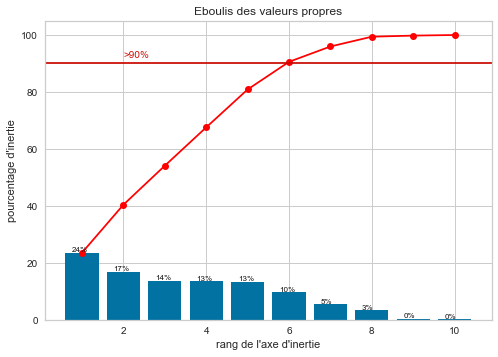

In [12]:
# Calcul des composantes principales
n_comp = 10
pca = decomposition.PCA(random_state=1, n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

plt.show()

On observe, grâce à l'éboulis des valeurs propores que 90% de l'inertie totale est associées aux 7 premiers axes d'inertie.

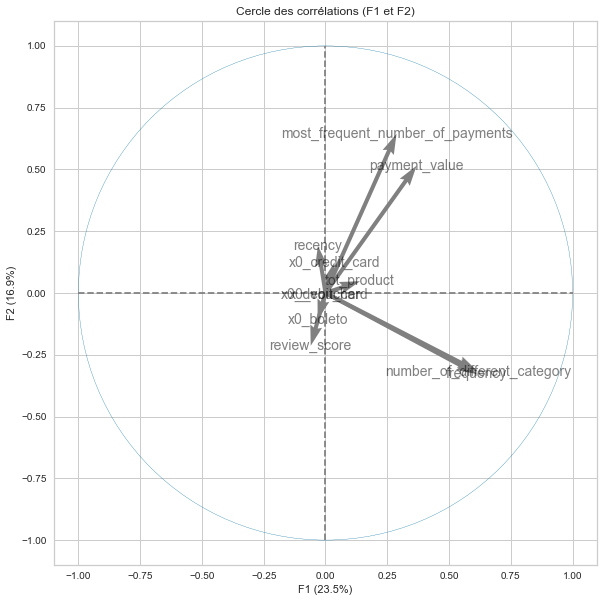

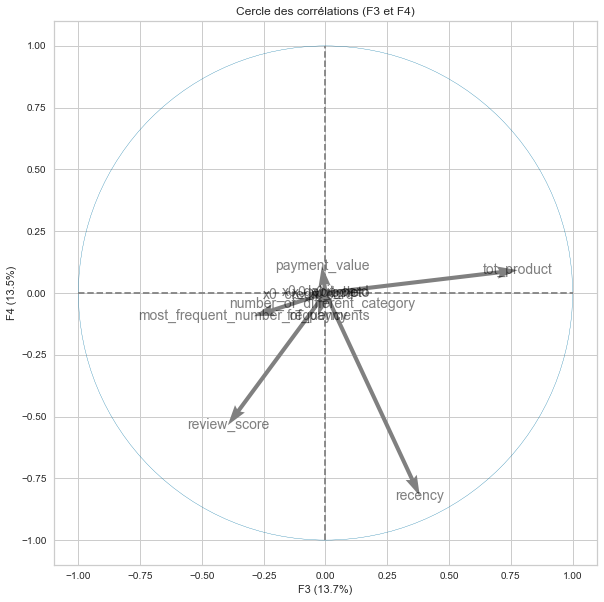

In [13]:
# Affichage du cercle des corrélations
features = X_scaled.columns
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0, 1),(2,3)], labels = np.array(features))

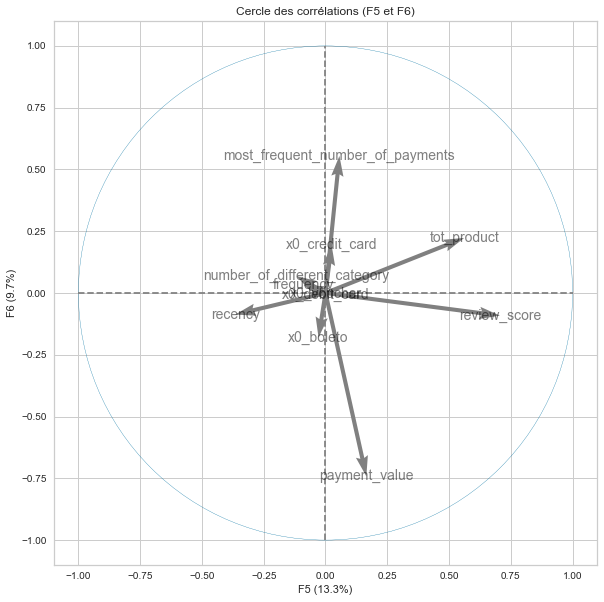

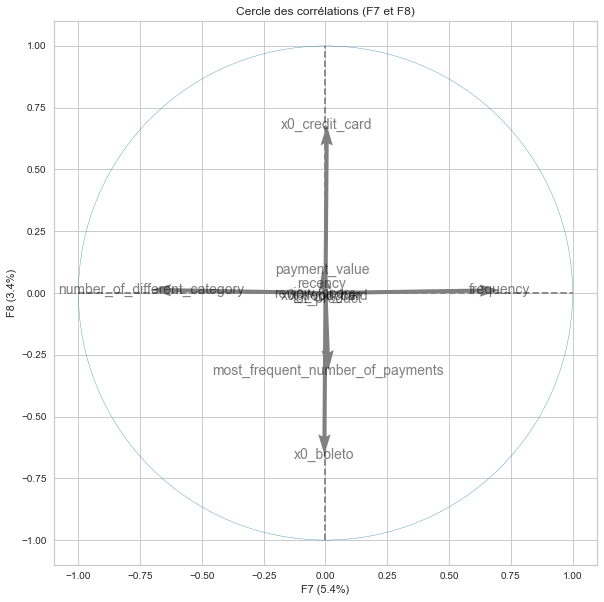

In [14]:
display_circles(pcs, n_comp, pca, [(4, 5),(6,7)], labels = np.array(features))

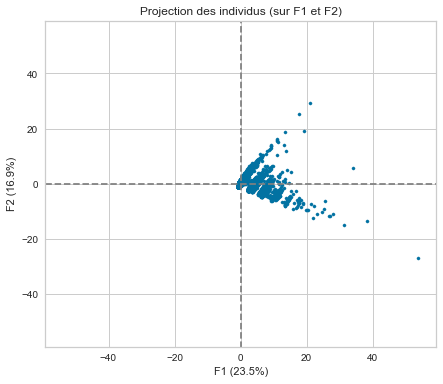

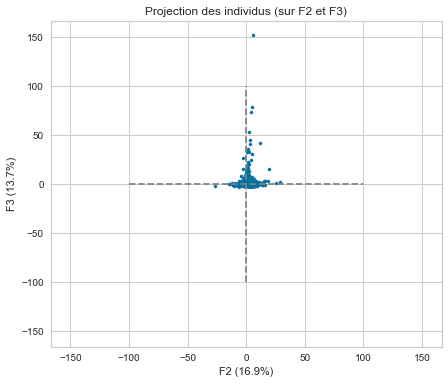

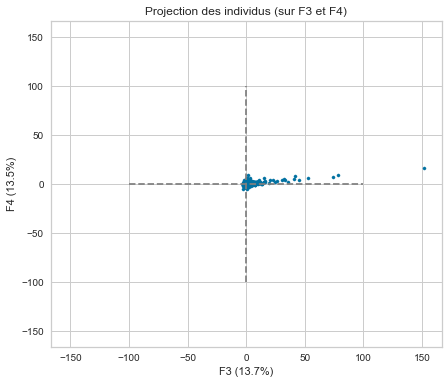

In [15]:
X_reduced_scaled = X_scaled.sample(10000, random_state=1)
res_pca = pca.transform(X_scaled)
X_r_projected = pca.transform(X_scaled)
display_factorial_planes(X_r_projected, n_comp, pca, [(0,1),(1,2),(2,3)])

In [16]:
tsne = manifold.TSNE(n_components=2,
                     perplexity=30,
                     n_iter=300,
                     n_jobs=-1,
                     init='pca',    
                     verbose=1
                    )
T =tsne.fit_transform(X_r_projected)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 93357 samples in 0.449s...
[t-SNE] Computed neighbors for 93357 samples in 4.176s...
[t-SNE] Computed conditional probabilities for sample 1000 / 93357
[t-SNE] Computed conditional probabilities for sample 2000 / 93357
[t-SNE] Computed conditional probabilities for sample 3000 / 93357
[t-SNE] Computed conditional probabilities for sample 4000 / 93357
[t-SNE] Computed conditional probabilities for sample 5000 / 93357
[t-SNE] Computed conditional probabilities for sample 6000 / 93357
[t-SNE] Computed conditional probabilities for sample 7000 / 93357
[t-SNE] Computed conditional probabilities for sample 8000 / 93357
[t-SNE] Computed conditional probabilities for sample 9000 / 93357
[t-SNE] Computed conditional probabilities for sample 10000 / 93357
[t-SNE] Computed conditional probabilities for sample 11000 / 93357
[t-SNE] Computed conditional probabilities for sample 12000 / 93357
[t-SNE] Computed conditional probabilities for sam

<AxesSubplot:title={'center':'Représentation du jeu de données via T-SNE'}>

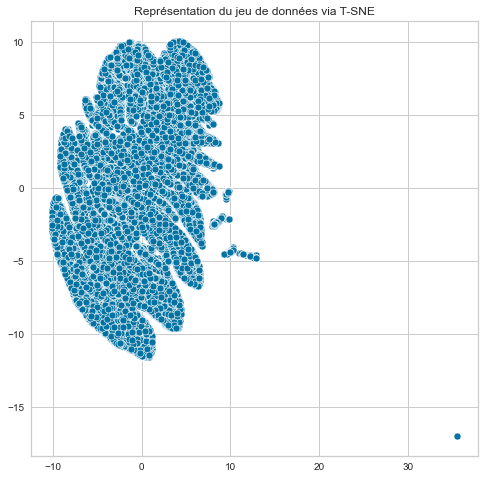

In [17]:
plt.figure(figsize=(8,8))
plt.title('Représentation du jeu de données via T-SNE')
sns.scatterplot(T[:,0], T[:,1])

In [18]:
stats.pearsonr(X_r_projected[:,0], X_r_projected[:,1])[0]

1.0736203592820459e-14

### Test PCA non linéaire

In [19]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(random_state=1, n_components=n_comp, kernel = 'rbf')
res_kpca_rbfb = kpca.fit_transform(X_reduced_scaled)

Text(0.5, 1.0, 'PC1 vs PC2 using kernelPCA')

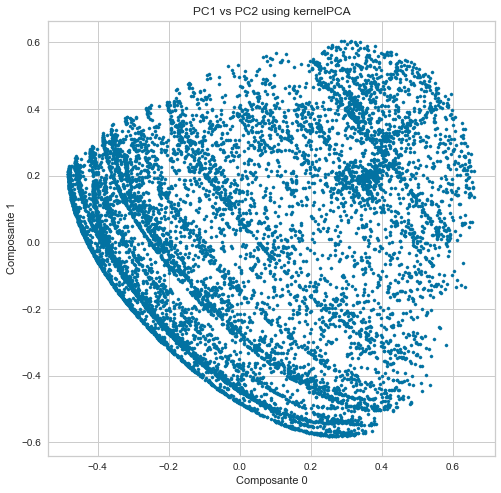

In [20]:
fig = plt.figure(figsize=(8,8))
plt.scatter(res_kpca_rbfb[:,0], res_kpca_rbfb[:,1], alpha = 1, s = 10)
plt.xlabel("Composante 0")
plt.ylabel("Composante 1")
plt.title("PC1 vs PC2 using kernelPCA")

In [21]:
stats.pearsonr(res_kpca_rbfb[:,0], res_kpca_rbfb[:,1])[0]

2.42861286636753e-17

## Segmentation sur 3 variables : RFM 

In [22]:
rfm_data = X[["recency","frequency", "payment_value"]]


rfm_data_scaled = X_scaled[["recency","frequency", "payment_value"]]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 93357 samples in 0.114s...
[t-SNE] Computed neighbors for 93357 samples in 2.295s...
[t-SNE] Computed conditional probabilities for sample 1000 / 93357
[t-SNE] Computed conditional probabilities for sample 2000 / 93357
[t-SNE] Computed conditional probabilities for sample 3000 / 93357
[t-SNE] Computed conditional probabilities for sample 4000 / 93357
[t-SNE] Computed conditional probabilities for sample 5000 / 93357
[t-SNE] Computed conditional probabilities for sample 6000 / 93357
[t-SNE] Computed conditional probabilities for sample 7000 / 93357
[t-SNE] Computed conditional probabilities for sample 8000 / 93357
[t-SNE] Computed conditional probabilities for sample 9000 / 93357
[t-SNE] Computed conditional probabilities for sample 10000 / 93357
[t-SNE] Computed conditional probabilities for sample 11000 / 93357
[t-SNE] Computed conditional probabilities for sample 12000 / 93357
[t-SNE] Computed conditional probabilities for sam

<AxesSubplot:title={'center':'Représentation du jeu de données via T-SNE'}>

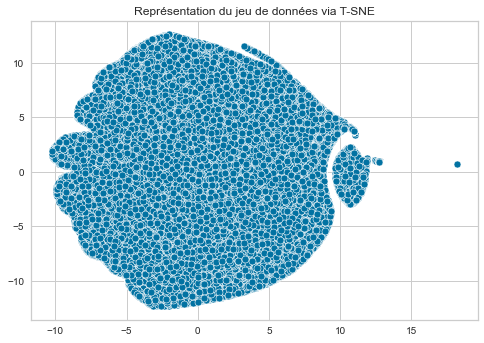

In [23]:
tsne = manifold.TSNE(n_components=2,
                     perplexity=30,
                     n_iter=300,
                     n_jobs=-1,
                     init='pca',    
                     verbose=1
                    )
rfm_T= tsne.fit_transform(rfm_data_scaled)

plt.title('Représentation du jeu de données via T-SNE')
sns.scatterplot(rfm_T[:,0], rfm_T[:,1])

### ACP

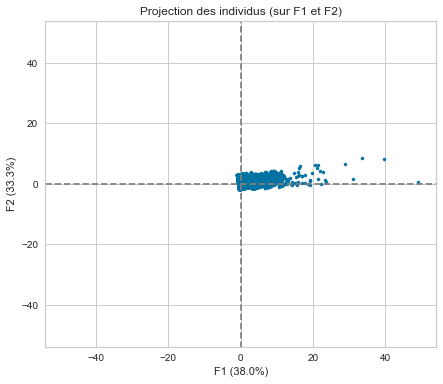

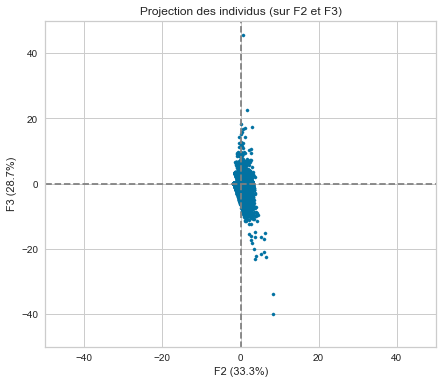

In [24]:
pca_rfm = decomposition.PCA(random_state=1)
projected_rfm = pca_rfm.fit_transform(rfm_data_scaled)

display_factorial_planes(projected_rfm, 4, pca_rfm, [(0,1),(1,2)])

In [25]:
print('Variance expliquée par les deux composantes principales :',
      pca_rfm.explained_variance_ratio_.cumsum()[-1])

Variance expliquée par les deux composantes principales : 1.0


In [26]:
rfm_data_scaled["PC1"] =projected_rfm[:,0]
rfm_data_scaled["PC2"] = projected_rfm[:,1]

In [27]:
rfm_data_scaled.head(5)

,recency,frequency,payment_value,PC1,PC2
customer_unique_id,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,-0.825362,-0.15983,-0.139967,-0.101491,-0.841030
0000b849f77a49e4a4ce2b2a4ca5be3f,-0.805701,-0.15983,-0.552003,-0.391082,-0.887580
0000f46a3911fa3c0805444483337064,1.959998,-0.15983,-0.339968,-0.607742,1.875435
0000f6ccb0745a6a4b88665a16c9f078,0.544379,-0.15983,-0.492987,-0.527834,0.454070
0004aac84e0df4da2b147fca70cf8255,0.328104,-0.15983,0.057557,-0.115865,0.328779


In [28]:
rfm_data_scaled.describe()

,recency,frequency,payment_value,PC1,PC2
count,9.335700e+04,9.335700e+04,9.335700e+04,9.335700e+04,9.335700e+04
mean,-2.373689e-17,1.177276e-15,6.748782e-17,2.158678e-17,-9.537569e-19
std,1.000005e+00,1.000005e+00,1.000005e+00,1.067395e+00,9.993984e-01
min,-1.552833e+00,-1.598303e-01,-6.134981e-01,-9.132911e-01,-1.632235e+00
25%,-8.122548e-01,-1.598303e-01,-4.197823e-01,-4.111753e-01,-8.041184e-01
50%,-1.241070e-01,-1.598303e-01,-2.489833e-01,-2.567979e-01,-1.293586e-01
75%,7.082242e-01,-1.598303e-01,4.139285e-02,-3.285110e-02,7.029007e-01
max,2.995496e+00,6.679461e+01,5.674542e+01,4.905648e+01,8.369027e+00


### Coefficient de silhouette et méthode du coude  

Le **coefficient de silhouette** est une mesure de
qualité d'une partition d'un ensemble de données.  
  
    
    
Pour chaque point, son coefficient de silhouette
est la différence entre la distance moyenne
avec les points du même groupe que lui (cohésion)
et la distance moyenne avec les points des autres
groupes voisins (séparation).  
  
  
Si cette différence est négative,
le point est en moyenne plus proche du groupe voisin
que du sien et il est donc mal classé.

A l'inverse, si cette différence est positive,
le point est en moyenne plus proche de son groupe
que du groupe voisin et il est donc bien classé.

Le coefficient de silhouette proprement dit est
la moyenne du coefficient de silhouette pour tous les points.


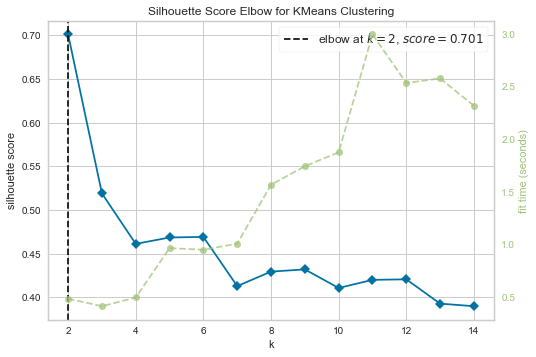

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [29]:
model = KMeans()
visualizer = KElbowVisualizer(model, 
                              k=(2,15),
                              metric='silhouette', 
                              timings=True)

visualizer.fit(rfm_data_scaled[["PC1","PC2"]])
visualizer.poof()

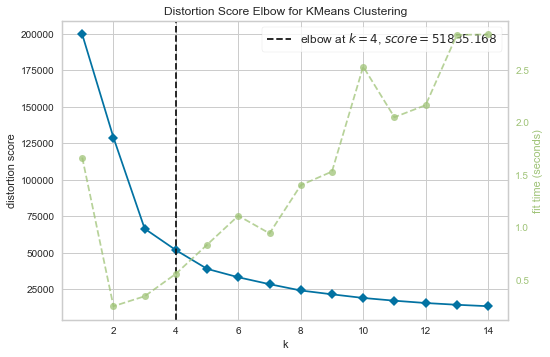

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
visualizer = KElbowVisualizer(model, k=(1,15))
visualizer.fit(rfm_data_scaled[["PC1","PC2"]])
visualizer.show()

**4** clusters sont nécessaires. 

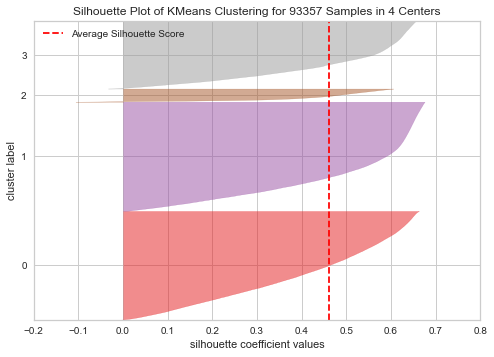

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 93357 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [31]:
model = KMeans(4)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(rfm_data_scaled[["PC1","PC2"]])    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

Nous obtenons **1** cluster très petit et 3 homogènes.   


Pour le petit cluster nous atteignons une valeur négative de  **-0.1** 

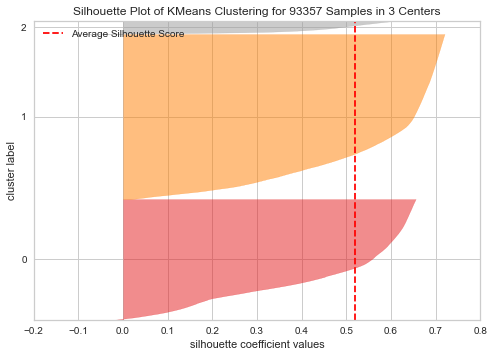

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 93357 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [32]:
model = KMeans(3)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(rfm_data_scaled[["PC1","PC2"]])    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

On obtiens **3** clusters mais avec un très gros en terme de population et un tout petit,  
mais homogènes en terme de coefficient de silhouette.

**4** clusters sont pertinents pour notre analyse. 

### Visualisation

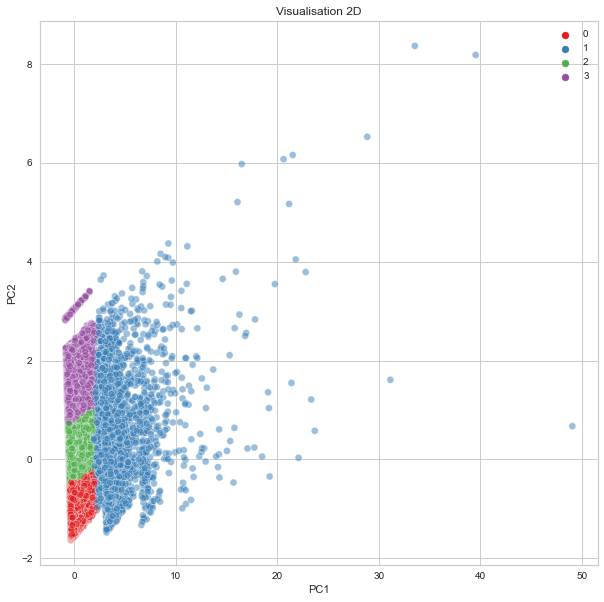

In [33]:
kmeans = KMeans(n_clusters = 4, random_state = 1)
kmeans.fit(rfm_data_scaled[["PC1","PC2"]])
# Extract cluster labels
cluster_labels = kmeans.labels_
        
plt.figure(figsize=(10,10))
plot = sns.scatterplot(
                x=rfm_data_scaled.iloc[:,3], y=rfm_data_scaled.iloc[:,4],
                hue=cluster_labels,
                palette="Set1",
                data=rfm_data_scaled[["PC1","PC2"]],
                legend="full",
                alpha=0.5).set(title = 'Visualisation 2D')
    

plt.show()

In [34]:
df_rfm_k4 = rfm_data.assign(Cluster = cluster_labels)
res_clusters_rfm  = df_rfm_k4.groupby(['Cluster']).agg({
        'recency': 'mean',
        'frequency': 'mean',
        'payment_value': ['mean', 'count']
    }).round(0)

res_clusters_rfm

recency frequency payment_value       
           mean      mean          mean  count
Cluster                                       
0          87.0       1.0         148.0  34542
1         221.0       2.0         809.0   4100
2         255.0       1.0         152.0  33779
3         458.0       1.0         159.0  20936

   - **Cluster 0** : clients récents  et unique avec un panier moyen de 148 Reals donc plutot bas.
   - **Cluster 1**: clients  réguliers, avec au moins 2 commandes dernière commande il y a 7 mois environ avec un panier moyen de 809 
   - **Cluster 2** : Les clients ayant commandé il y a 8,5 mois , avec un panier moyen de 152, donc plutot faible.
   - **Cluster 3** : Clients tres anciens ( de plus d'un an, 15 mois) avec un panier moyen de 160. 

#### Visualisation sans ACP

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 93357 samples in 0.114s...
[t-SNE] Computed neighbors for 93357 samples in 2.287s...
[t-SNE] Computed conditional probabilities for sample 1000 / 93357
[t-SNE] Computed conditional probabilities for sample 2000 / 93357
[t-SNE] Computed conditional probabilities for sample 3000 / 93357
[t-SNE] Computed conditional probabilities for sample 4000 / 93357
[t-SNE] Computed conditional probabilities for sample 5000 / 93357
[t-SNE] Computed conditional probabilities for sample 6000 / 93357
[t-SNE] Computed conditional probabilities for sample 7000 / 93357
[t-SNE] Computed conditional probabilities for sample 8000 / 93357
[t-SNE] Computed conditional probabilities for sample 9000 / 93357
[t-SNE] Computed conditional probabilities for sample 10000 / 93357
[t-SNE] Computed conditional probabilities for sample 11000 / 93357
[t-SNE] Computed conditional probabilities for sample 12000 / 93357
[t-SNE] Computed conditional probabilities for sam

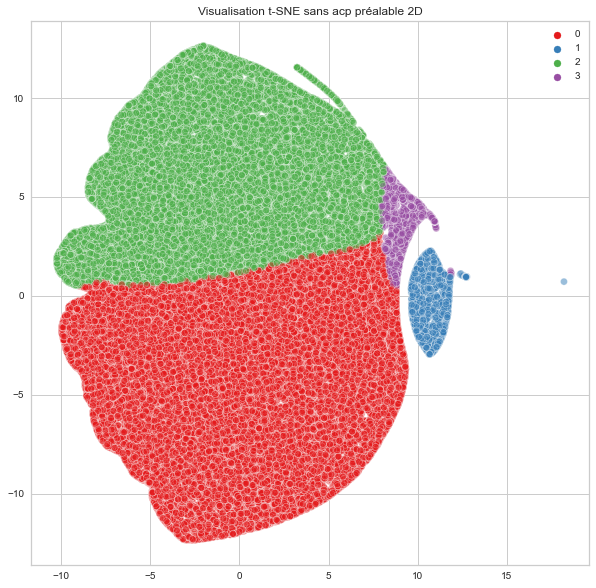

In [35]:
kmeans = KMeans(n_clusters = 4, random_state = 1)
kmeans.fit(rfm_data_scaled.iloc[:,:3])
# Extract cluster labels
cluster_labels = kmeans.labels_
        
# Create a cluster label column in original dataset
df3_sans_acp = rfm_data.assign(Cluster = cluster_labels)


tsne = manifold.TSNE(n_components=2,
                     perplexity=30,
                     n_iter=300,
                     n_jobs=-1,
                     init='pca',    
                     verbose=1
                    )

    # Application du T-SNE
df3_sans_acp_projected = tsne.fit_transform(rfm_data_scaled.iloc[:,:3])
plt.figure(figsize=(10,10))
plot = sns.scatterplot(
                x=df3_sans_acp_projected[:,0], y=df3_sans_acp_projected[:,1],
                hue=cluster_labels,
                palette="Set1",
                data=df3_sans_acp,
                legend="full",
                alpha=0.5).set(title = 'Visualisation t-SNE sans acp préalable 2D')
    

plt.show()

### Clustering hierarchique - Dendogram

In [36]:
def plot_dendrogram(model, **kwargs):
    '''
    Return the dendogram of a dataset
    
        Parameters: 
            model: model for the linkage matrix
            **kwargs: parameters for the model
            
        Returns:
            plot of the dengogram
            
    '''

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

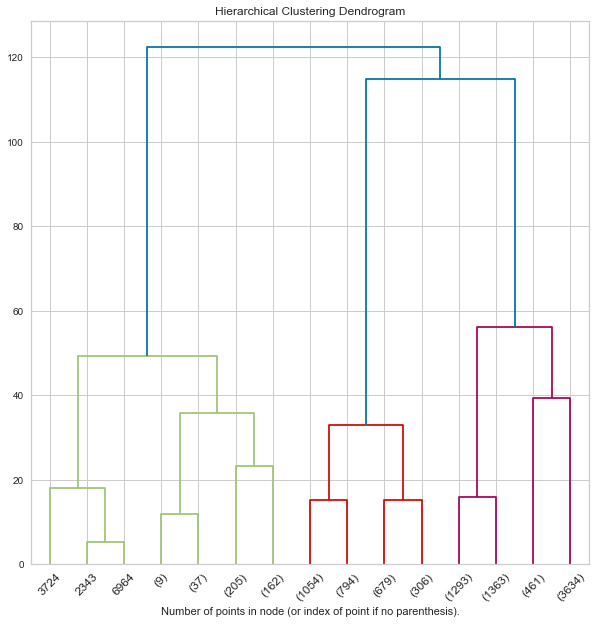

In [37]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

# I select my data
rfm_reduced = rfm_data_scaled[["PC1","PC2"]].iloc[:10000,:]

model = model.fit(rfm_reduced)
plt.figure(figsize=(10,10))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.xticks(rotation=45)
plt.show()

Cette méthode ne sera **pas utilisée** pour notre segmentation car : 
   *   Elle est lourde en calcul et nécessite un échantillon qui fausse la segmentation. 
   *   Les clusters ne sont pas équilibrés, nous passons de 9 clients à 7000 env. 

### Clustering par densité  : DBscan

Pour l'algorithme DBSCAN, il faut déterminer 2 paramètres:

   * min_samples : le plus petit nombre de points requis pour former un cluster.
   * eps (epsilon) : la distance maximale entre deux points appartenant à un même cluster.


Pour le paramètre eps, nous allons le déterminer en calculant la distance moyenne entre chaque point et ses plus proches voisins à l'aide de NearestNeighbors.

**Echantillon réduis de notre jeu de donnée.**

In [38]:
rfm_reduced = rfm_data_scaled.sample(10000)

**Calcul de la distance moyenne entre chaque points**

In [39]:
neigh = NearestNeighbors(n_neighbors=8000)
nbrs = neigh.fit(rfm_reduced)
distances, indices = nbrs.kneighbors(rfm_reduced)

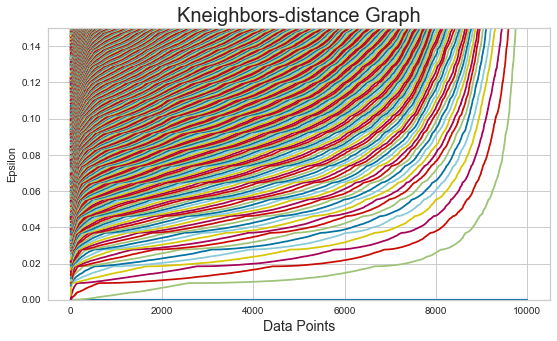

In [40]:
#Tracé des résultats
distances = np.sort(distances, axis=0)
#distances = distances[:,1]
plt.figure(figsize=(9,5))
plt.plot(distances)
plt.ylim([0, 0.15])
plt.title('Kneighbors-distance Graph',fontsize=20)
plt.xlabel('Data Points',fontsize=14)
plt.ylabel('Epsilon')
plt.show()

**Clustering Dbscan**

In [41]:
db3 = DBSCAN(eps = 0.04, 
             min_samples=20,
               n_jobs=-1).fit(rfm_reduced)

In [42]:
# Nombre de clusters dans les labels, ignorant le bruit si présent
n_clusters_ = len(set(db3.labels_)) - (1 if -1 in db3.labels_ else 0)
n_noise_ = list(db3.labels_).count(-1)

print('Nombre de clusters: %d' % n_clusters_)
print('Nombre de points non classés: %d' % n_noise_)

Nombre de clusters: 28
Nombre de points non classés: 7213


In [43]:
#db3.labels_.value_counts()
unique, counts = np.unique(db3.labels_, return_counts=True)

dict(zip(unique, counts))

{-1: 7213,
 0: 476,
 1: 542,
 2: 635,
 3: 88,
 4: 42,
 5: 280,
 6: 48,
 7: 158,
 8: 40,
 9: 38,
 10: 28,
 11: 37,
 12: 12,
 13: 33,
 14: 22,
 15: 25,
 16: 23,
 17: 20,
 18: 31,
 19: 14,
 20: 20,
 21: 27,
 22: 33,
 23: 25,
 24: 32,
 25: 17,
 26: 28,
 27: 13}

In [45]:
colors = ['royalblue', 'maroon', 'forestgreen',
          'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.010s...
[t-SNE] Computed neighbors for 10000 samples in 0.212s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.033017
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.078270
[t-SNE] KL divergence after 300 iterations: 2.202545


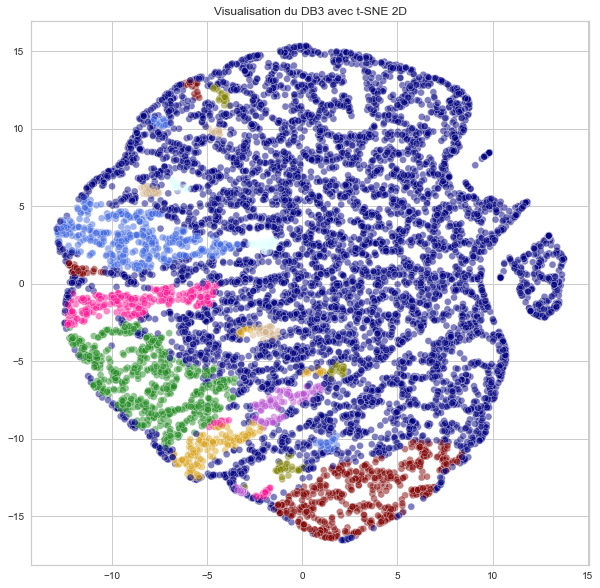

In [46]:
    # Application du T-SNE
df3_reduced_sans_acp_projected = tsne.fit_transform(rfm_reduced.iloc[:,:3])
plt.figure(figsize=(10,10))
plot = sns.scatterplot(
                x=df3_reduced_sans_acp_projected[:,0], y=df3_reduced_sans_acp_projected[:,1],
                palette="Set1",
                data=rfm_reduced,
                legend="full",
                alpha=0.5,
                c=vectorizer(db3.labels_)
                ).set(title = 'Visualisation du DB3 avec t-SNE 2D')
    

plt.show()

<AxesSubplot:title={'center':'Représentation de la séparation des données du DBSCAN sur les composantes principales'}, xlabel='PC1', ylabel='PC2'>

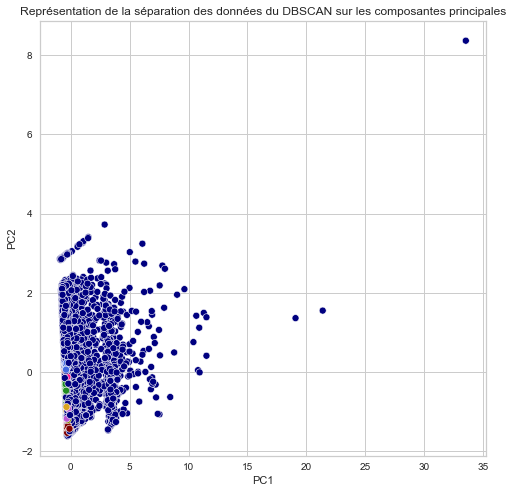

In [47]:
plt.figure(figsize=(8,8))
plt.title('Représentation de la séparation des données du DBSCAN sur les composantes principales')


sns.scatterplot(rfm_reduced.iloc[:,3],
                rfm_reduced.iloc[:,4], 
                data=rfm_reduced[["PC1","PC2"]],
                c=vectorizer(db3.labels_))

Les segments ne sont pas homogènes, ni identifiables. Ils sont imbriqués les uns sur les autres. 


* D'un point de vue professionnel ce n'est pas exploitable. 
________________________________________
__________________________________________

L'algorithme de segmentation qui à donné les meilleurs résultats pour est le **Kmeans**. 

Nous allons donc conserver cette méthode et tenter d'améliorer la segmentation en augmentant le nombre de variables. 

## Segmentation avec 4 variables 

* **Récence** : nombre de jours depuis la dernière commande
* **Fréquence** : le nombre de commandes différentes passées par le client
* **Montant** : le montant total dépensé par clients
* **Satisfaction** : on ajoute le critère de satisfaction client à la segmentation

In [48]:
df4 = X[["recency","frequency", "payment_value","review_score"]]

df4.rename(columns={'payment_value': 'monetary',
                    'review_score': 'satisfaction'},
           inplace=True)

df4_scaled = X_scaled[["recency","frequency", "payment_value", "review_score"]]
df4_scaled.rename(columns={'payment_value': 'monetary',
                    'review_score': 'satisfaction'},
           inplace=True)


### ACP

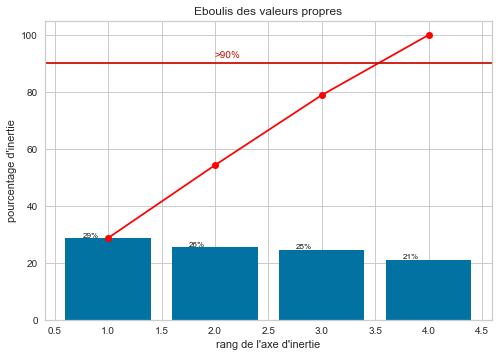

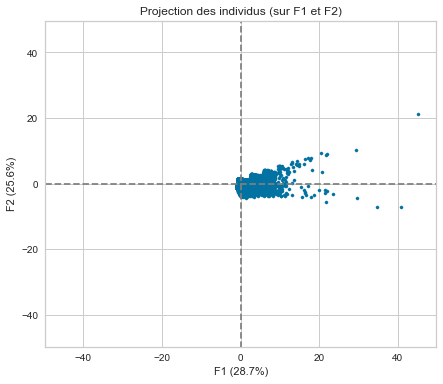

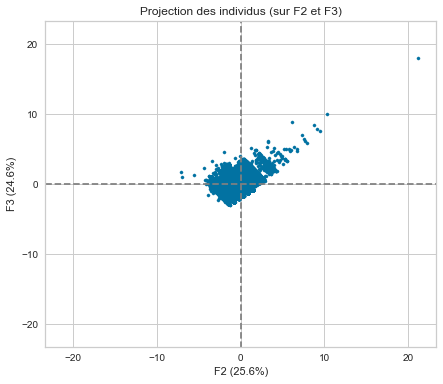

In [49]:
pca4 = decomposition.PCA(random_state=1)
projected4 = pca4.fit_transform(df4_scaled)

display_scree_plot(pca4)

plt.show()
display_factorial_planes(projected4, 5, pca4, [(0,1),(1,2)])

Nous voyons, à l'aide l'éboulis des valeurs propres que 3 composantes sont nécessaires afin de représenter 95% de nos valeurs. 

In [50]:
print('Variance expliquée par les deux composantres principales :')
print(pca4.explained_variance_ratio_.cumsum()[2])

Variance expliquée par les deux composantres principales :
0.7888440497794482


In [51]:
df4_scaled["PC1"] =projected4[:,0]
df4_scaled["PC2"] = projected4[:,1]
df4_scaled["PC3"] = projected4[:,2]

df4_pca = df4_scaled[['PC1','PC2', 'PC3']]

###  Coefficient de silhouette et méthode du coude

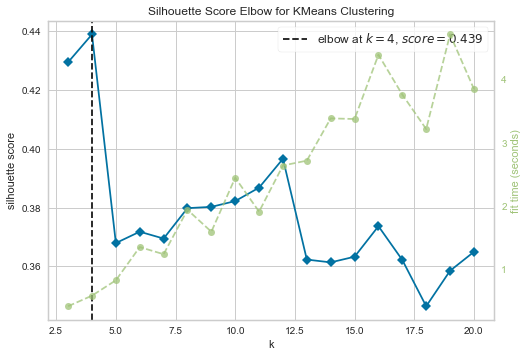

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [52]:
model = KMeans()
visualizer = KElbowVisualizer(model, 
                              k=(3,21),
                              metric='silhouette', 
                              timings=True)

visualizer.fit(df4_pca)
visualizer.poof()

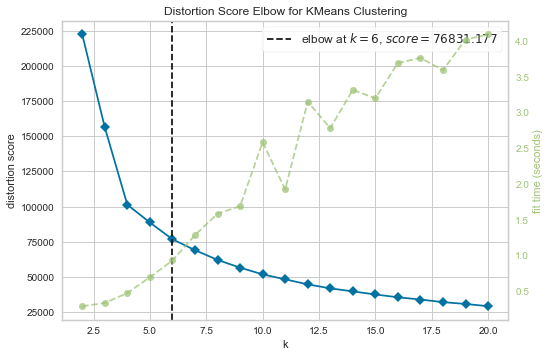

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [53]:
model = KMeans()
visualizer = KElbowVisualizer(model,
                              k=(2, 21))

visualizer.fit(df4_pca)
visualizer.poof()

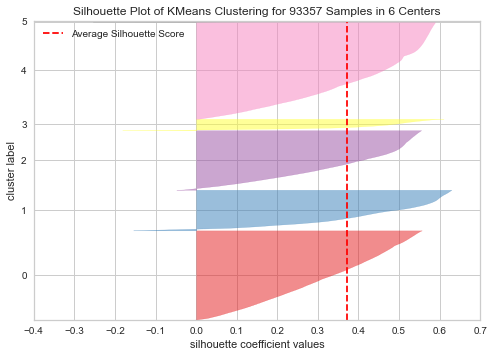

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 93357 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [54]:
model = KMeans(6)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(df4_pca)    
visualizer.poof() 

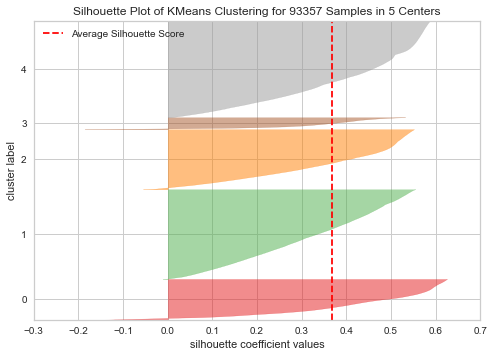

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 93357 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [55]:
model = KMeans(5)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(df4_pca)    
visualizer.poof() 

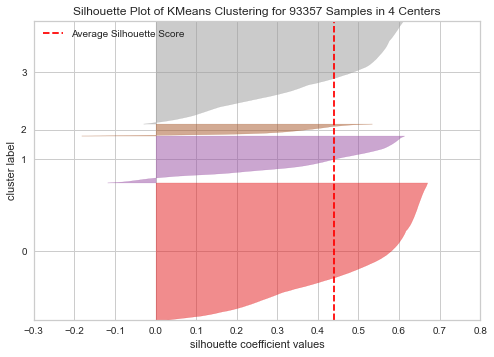

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 93357 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [56]:
model = KMeans(4)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(df4_pca)    
visualizer.poof() 

### Kmeans

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 93357 samples in 0.173s...
[t-SNE] Computed neighbors for 93357 samples in 3.798s...
[t-SNE] Computed conditional probabilities for sample 1000 / 93357
[t-SNE] Computed conditional probabilities for sample 2000 / 93357
[t-SNE] Computed conditional probabilities for sample 3000 / 93357
[t-SNE] Computed conditional probabilities for sample 4000 / 93357
[t-SNE] Computed conditional probabilities for sample 5000 / 93357
[t-SNE] Computed conditional probabilities for sample 6000 / 93357
[t-SNE] Computed conditional probabilities for sample 7000 / 93357
[t-SNE] Computed conditional probabilities for sample 8000 / 93357
[t-SNE] Computed conditional probabilities for sample 9000 / 93357
[t-SNE] Computed conditional probabilities for sample 10000 / 93357
[t-SNE] Computed conditional probabilities for sample 11000 / 93357
[t-SNE] Computed conditional probabilities for sample 12000 / 93357
[t-SNE] Computed conditional probabilities for sam

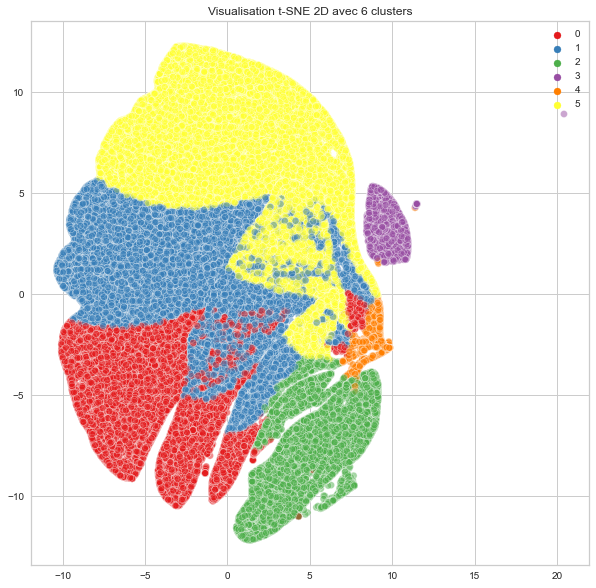

In [94]:
kmeans = KMeans(n_clusters = 6, random_state = 1)
kmeans.fit(df4_scaled)
# Extract cluster labels
cluster_labels = kmeans.labels_
        
# Create a cluster label column in original dataset
df4_k6 = df4.assign(Cluster = cluster_labels)


tsne = manifold.TSNE(n_components=2,
                     perplexity=30,
                     n_iter=300,
                     n_jobs=-1,
                     init='pca',    
                     verbose=1
                    )

    # Application du T-SNE
df4_pro = tsne.fit_transform(df4_scaled.iloc[:,:4])
plt.figure(figsize=(10,10))
plot = sns.scatterplot(
                x=df4_pro[:,0], y=df4_pro[:,1],
                hue=cluster_labels,
                palette="Set1",
                data=df4,
                legend="full",
                alpha=0.5).set(title = 'Visualisation t-SNE 2D avec 6 clusters')
    

plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 93357 samples in 0.152s...
[t-SNE] Computed neighbors for 93357 samples in 3.633s...
[t-SNE] Computed conditional probabilities for sample 1000 / 93357
[t-SNE] Computed conditional probabilities for sample 2000 / 93357
[t-SNE] Computed conditional probabilities for sample 3000 / 93357
[t-SNE] Computed conditional probabilities for sample 4000 / 93357
[t-SNE] Computed conditional probabilities for sample 5000 / 93357
[t-SNE] Computed conditional probabilities for sample 6000 / 93357
[t-SNE] Computed conditional probabilities for sample 7000 / 93357
[t-SNE] Computed conditional probabilities for sample 8000 / 93357
[t-SNE] Computed conditional probabilities for sample 9000 / 93357
[t-SNE] Computed conditional probabilities for sample 10000 / 93357
[t-SNE] Computed conditional probabilities for sample 11000 / 93357
[t-SNE] Computed conditional probabilities for sample 12000 / 93357
[t-SNE] Computed conditional probabilities for sam

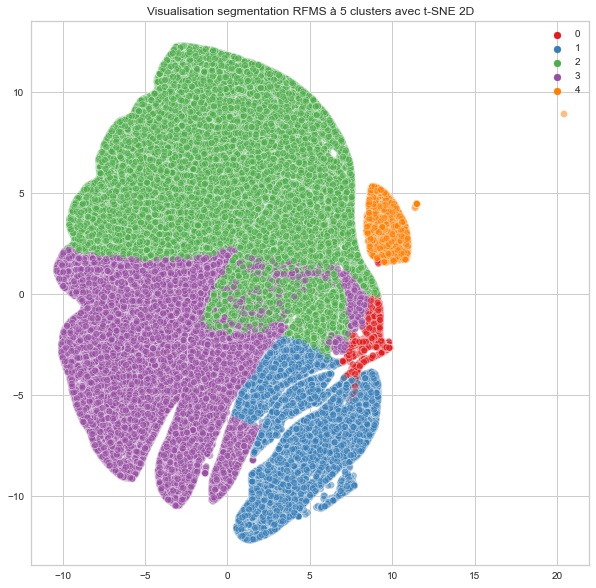

In [95]:
kmeans = KMeans(n_clusters = 5, random_state = 1)
kmeans.fit(df4_scaled)
# Extract cluster labels
cluster_labels = kmeans.labels_
        
# Create a cluster label column in original dataset
df4_k5 = df4.assign(Cluster = cluster_labels)



df4_projected_5 = tsne.fit_transform(df4_scaled.iloc[:,:4])
plt.figure(figsize=(10,10))
plot = sns.scatterplot(
                x=df4_projected_5[:,0], y=df4_projected_5[:,1],
                hue=cluster_labels,
                palette="Set1",
                data=df4,
                legend="full",
                alpha=0.5).set(title = 'Visualisation segmentation RFMS à 5 clusters avec t-SNE 2D')
    

plt.show()

In [97]:
df4_k5 = df4.assign(Cluster = cluster_labels)
res_clusters_df4  = df4_k5.groupby(["Cluster"]).agg({
        'recency': 'mean',
        'frequency': 'mean',
        'monetary': ['mean', 'count'],
        'satisfaction' : ['mean']
    }).round(0)

res_clusters_df4


recency frequency monetary        satisfaction
           mean      mean     mean  count         mean
Cluster                                               
0         239.0       1.0   1768.0   1320          4.0
1         234.0       1.0    181.0  15291          2.0
2         122.0       1.0    144.0  42157          5.0
3         392.0       1.0    149.0  31824          5.0
4         219.0       2.0    351.0   2765          4.0

* 0: Clients unique satisfaits commencent à être anciens
* 1: Clients mécontents unique (7 mois)
* 2: Clients récents, satisfaits
* 3: Clients presque perdus( + 13 mois ) , satisfaits du service
* 4: Clients réguliers avec dépense totale élevé et plutôt satisfaits


In [102]:
cluster_label ={ 0:"Clients satisfaits à relancer rapidement" ,
         1 :"Clients insatisfaits à récupérer",
          2 : "Nouveaux clients, à fidéliser",
          3 :  "Clients perdus",
          4 : "Clients fidèles à récompenser"
         }
df4_k5["Categorie de clusters"] = df4_k5["Cluster"].replace(cluster_label, regex = False)
res_clusters_df4["Categorie de clusters"]= cluster_label.values()

In [103]:
res_clusters_df4

recency frequency monetary        satisfaction  \
           mean      mean     mean  count         mean   
Cluster                                                  
0         239.0       1.0   1768.0   1320          4.0   
1         234.0       1.0    181.0  15291          2.0   
2         122.0       1.0    144.0  42157          5.0   
3         392.0       1.0    149.0  31824          5.0   
4         219.0       2.0    351.0   2765          4.0   

                            Categorie de clusters  
                                                   
Cluster                                            
0        Clients satisfaits à relancer rapidement  
1                Clients insatisfaits à récupérer  
2                   Nouveaux clients, à fidéliser  
3                                  Clients perdus  
4                   Clients fidèles à récompenser

In [88]:
cluster_label ={ 0: "Nouveaux clients, à fidéliser",
         1 : "Clients perdus",
          2 : "Clients insatisfaits à récupérer",
          3 : "Clients fidèles à récompenser",
          4 : "Clients satisfaits à relancer rapidement"
         }
df4_k5["Categorie de clusters"] = df4_k5["Cluster"].replace(cluster_label, regex = False)

## Export pour contrat de maintenance

In [104]:
df_simulation = df[["recency","frequency", "payment_value","review_score", "order_purchase_timestamp"]]

df_simulation

,recency,frequency,payment_value,review_score,order_purchase_timestamp
customer_unique_id,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111.0,1,141.90,5.0,2018-05-10 10:56:27
0000b849f77a49e4a4ce2b2a4ca5be3f,114.0,1,27.19,4.0,2018-05-07 11:11:27
0000f46a3911fa3c0805444483337064,536.0,1,86.22,3.0,2017-03-10 21:05:03
0000f6ccb0745a6a4b88665a16c9f078,320.0,1,43.62,4.0,2017-10-12 20:29:41
0004aac84e0df4da2b147fca70cf8255,287.0,1,196.89,5.0,2017-11-14 19:45:42
...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,446.0,1,4134.84,5.0,2017-06-08 21:00:36
fffea47cd6d3cc0a88bd621562a9d061,261.0,1,84.58,4.0,2017-12-10 20:07:56
ffff371b4d645b6ecea244b27531430a,567.0,1,112.46,5.0,2017-02-07 15:49:16


In [105]:
df_simulation.to_csv('data_simulation.csv')


## Conclusion



La segmentation se fera avec l'algorithme Kmeans, avec les critères RFMS. 